Using Landy Szalay estimator to calculate correlation function.

Code using the module count_pair_vv4 and main program ver.7 in my fortran code. The box is cut in z direction, consider nonPBC case. Compare to the previous results using fullbox PBC.

This code is for velocity autocorrelation in redshift space.

In [2]:
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
path ='/Users/ngoc/Desktop/Master-study/project'

In [3]:

#cosmological parameters
z        = 0.306                   #redshift
f        = 0.687255861             #growth rate
Omg_lamb = 0.685                   #dark energy density parameter
Omg_m    = 1. - Omg_lamb           #matter density parameter
a        = 1./(1. + z)             #scale factor
E_a      = np.sqrt(Omg_m*(1.+z)**3. + Omg_lamb) 
b        = 3.11                                 #bias for halo b = \delta_halo/\delta_matter
beta     = f/b                                  #linear RSD parameter
#relation between the real and redshift space power spectrum multipoles (Kaiser's coefficients)
K0       = 1 + 2/3*beta + 1/5*beta**2
K2       = 4/3*beta + 4/7*beta**2
K4       = 8/35*beta**2


In [4]:
# load results from xi_vv in real space 
#(Linear limit, xi_vv in redshift = in realspace) PBC, fullbox to compare
xi_vv0_full       = np.loadtxt(path+'/my-f-code/results/xi-vv0s-F.txt', usecols =(1))
xi_vv2_full       = np.loadtxt(path+'/my-f-code/results/xi-vv2s-F.txt', usecols =(1))
error_xi_vv0_full = np.loadtxt(path+'/my-f-code/results/xi-vv0s-F.txt', usecols =(2))
error_xi_vv2_full = np.loadtxt(path+'/my-f-code/results/xi-vv2s-F.txt', usecols =(2))

In [5]:
#simulation paramters
boxsize  = 2000                    #length of 1D of the box [Mpc/h]
nbins    = 50                      #number of bins
rmin     = 1.
rmax     = boxsize/3
bins     = np.logspace(np.log10(rmin), np.log10(rmax), nbins+1)     
mu_max   = 1                       #maximum value of cosine of the angle separated from the LOS
nmu_bins = 10                      #number of bins of the angle separation 
delta_mu = mu_max/nmu_bins
ndata    = 8                       #number of data
realizations = "12345678"          #for reading the data

#Legendre polynomials
P0 = 1
P2 = lambda mu: (3*mu**2-1)/2
P4 = lambda mu: (35*mu**4 - 30*mu**2 + 3)/8 

l0 = 0
l2 = 2

In [6]:
#LS estimator
A_0_nonPBC = np.zeros((ndata,nbins))
r_nonPBC   = np.zeros((ndata,nbins))
A_2_nonPBC = np.zeros((ndata,nbins))
for i in range (0,ndata):

    #load results for 8 realizations
    DDsmu_nonPBC = np.loadtxt(path+'/my-f-code/results/vvs-cutbox03Lnew-nonPBC-realization'
                         +realizations[i]+'.txt', usecols = (0))
    mu_nonPBC    = np.loadtxt(path+'/my-f-code/results/vvs-cutbox03Lnew-nonPBC-realization'
                         +realizations[i]+'.txt', usecols = (2))
    rsmu_nonPBC  = np.loadtxt(path+'/my-f-code/results/vvs-cutbox03Lnew-nonPBC-realization'
                         +realizations[i]+'.txt', usecols = (1))

    # RR pairs count
    RRs_nonPBC = np.loadtxt(path+'/my-f-code/results/RRs-cutbox03Lnew-nonPBC-realization'
                         +realizations[i]+'.txt', usecols = (0))
    DR = np.loadtxt(path+'/my-f-code/results/DRs-cutbox03Lnew-nonPBC-realization'
                         +realizations[i]+'.txt', usecols = (0))
        
    xi0_nonPBC = np.zeros(nbins)
    xi2_nonPBC = np.zeros(nbins)
    r0_nonPBC  = np.zeros(nbins)
 
    for ii in range(0,nbins):
        RR_mus = RRs_nonPBC[ii]/nmu_bins
        for j in range ((ii)*nmu_bins,(ii+1)*nmu_bins):
            xi0_nonPBC[ii] += ((DDsmu_nonPBC[j]-2*DR[j])/RR_mus+2)*P0*delta_mu 
            xi2_nonPBC[ii] += ((DDsmu_nonPBC[j]-2*DR[j])/RR_mus+2)*delta_mu*P2(mu_nonPBC[j])
            r0_nonPBC[ii]  += rsmu_nonPBC[j]

    #monopole    
    A_0_nonPBC[i] = xi0_nonPBC
    r_nonPBC[i]   = r0_nonPBC/nmu_bins    
    
    #quadrupole
    A_2_nonPBC[i] = xi2_nonPBC*(2*l2+1)
# calculate the average of 8 realizations and error bars, F code
xi_vv0s_03_LS = np.zeros(nbins)
xi_vv2s_03_LS = np.zeros(nbins)
r             = np.zeros(nbins)

for i in range(0,nbins):
    xi_vv0s_03_LS[i] = np.mean(A_0_nonPBC[0:ndata,i])
    xi_vv2s_03_LS[i] = np.mean(A_2_nonPBC[0:ndata,i])
    r[i]             = np.mean(r_nonPBC[0:ndata,i])
    
error_xi_vv0s_03_LS = np.zeros(nbins)
error_xi_vv2s_03_LS = np.zeros(nbins)
for i in range(0,nbins):
    a0 = 0
    a2 = 0
    for j in range(0,ndata):
        a0 += (A_0_nonPBC[j,i] - xi_vv0s_03_LS[i])**2
        a2 += (A_2_nonPBC[j,i] - xi_vv2s_03_LS[i])**2
    error_xi_vv0s_03_LS[i] = np.sqrt(a0/((ndata-1)*ndata)) #standard error of the mean
    error_xi_vv2s_03_LS[i] = np.sqrt(a2/((ndata-1)*ndata))
    

<ipython-input-6-9307f8f71f74>:28: RuntimeWarning: invalid value encountered in double_scalars
  xi0_nonPBC[ii] += ((DDsmu_nonPBC[j]-2*DR[j])/RR_mus+2)*P0*delta_mu
<ipython-input-6-9307f8f71f74>:29: RuntimeWarning: invalid value encountered in double_scalars
  xi2_nonPBC[ii] += ((DDsmu_nonPBC[j]-2*DR[j])/RR_mus+2)*delta_mu*P2(mu_nonPBC[j])
<ipython-input-6-9307f8f71f74>:28: RuntimeWarning: divide by zero encountered in double_scalars
  xi0_nonPBC[ii] += ((DDsmu_nonPBC[j]-2*DR[j])/RR_mus+2)*P0*delta_mu
<ipython-input-6-9307f8f71f74>:29: RuntimeWarning: divide by zero encountered in double_scalars
  xi2_nonPBC[ii] += ((DDsmu_nonPBC[j]-2*DR[j])/RR_mus+2)*delta_mu*P2(mu_nonPBC[j])


In [7]:
#LS estimator
A_0_nonPBC = np.zeros((ndata,nbins))
A_2_nonPBC = np.zeros((ndata,nbins))
for i in range (0,ndata):

    #load results for 8 realizations
    DDsmu_nonPBC = np.loadtxt(path+'/my-f-code/results/vvs-cutbox05Lnew-nonPBC-realization'
                         +realizations[i]+'.txt', usecols = (0))
    mu_nonPBC    = np.loadtxt(path+'/my-f-code/results/vvs-cutbox05Lnew-nonPBC-realization'
                         +realizations[i]+'.txt', usecols = (2))

    # RR pairs count
    RRs_nonPBC = np.loadtxt(path+'/my-f-code/results/RRs-cutbox05Lnew-nonPBC-realization'
                         +realizations[i]+'.txt', usecols = (0))
    DR = np.loadtxt(path+'/my-f-code/results/DRs-cutbox05Lnew-nonPBC-realization'
                         +realizations[i]+'.txt', usecols = (0))
         
    xi0_nonPBC = np.zeros(nbins)
    xi2_nonPBC = np.zeros(nbins)

    for ii in range(0,nbins):
        RR_mus = RRs_nonPBC[ii]/nmu_bins
        for j in range ((ii)*nmu_bins,(ii+1)*nmu_bins):
            xi0_nonPBC[ii] += ((DDsmu_nonPBC[j]-2*DR[j])/RR_mus+2)*P0*delta_mu 
            xi2_nonPBC[ii] += ((DDsmu_nonPBC[j]-2*DR[j])/RR_mus+2)*delta_mu*P2(mu_nonPBC[j])
   
    #monopole    
    A_0_nonPBC[i] = xi0_nonPBC
    
    #quadrupole
    A_2_nonPBC[i] = xi2_nonPBC*(2*l2+1)
# calculate the average of 8 realizations and error bars, F code
xi_vv0s_05_LS = np.zeros(nbins)
xi_vv2s_05_LS = np.zeros(nbins)

for i in range(0,nbins):
    xi_vv0s_05_LS[i] = np.mean(A_0_nonPBC[0:ndata,i])
    xi_vv2s_05_LS[i] = np.mean(A_2_nonPBC[0:ndata,i])

error_xi_vv0s_05_LS = np.zeros(nbins)
error_xi_vv2s_05_LS = np.zeros(nbins)
for i in range(0,nbins):
    a0 = 0
    a2 = 0
    for j in range(0,ndata):
        a0 += (A_0_nonPBC[j,i] - xi_vv0s_05_LS[i])**2
        a2 += (A_2_nonPBC[j,i] - xi_vv2s_05_LS[i])**2
    error_xi_vv0s_05_LS[i] = np.sqrt(a0/((ndata-1)*ndata)) #standard error of the mean
    error_xi_vv2s_05_LS[i] = np.sqrt(a2/((ndata-1)*ndata))    

<ipython-input-7-ba1d8be4d2ca>:24: RuntimeWarning: divide by zero encountered in double_scalars
  xi0_nonPBC[ii] += ((DDsmu_nonPBC[j]-2*DR[j])/RR_mus+2)*P0*delta_mu
<ipython-input-7-ba1d8be4d2ca>:25: RuntimeWarning: divide by zero encountered in double_scalars
  xi2_nonPBC[ii] += ((DDsmu_nonPBC[j]-2*DR[j])/RR_mus+2)*delta_mu*P2(mu_nonPBC[j])
<ipython-input-7-ba1d8be4d2ca>:24: RuntimeWarning: invalid value encountered in double_scalars
  xi0_nonPBC[ii] += ((DDsmu_nonPBC[j]-2*DR[j])/RR_mus+2)*P0*delta_mu
<ipython-input-7-ba1d8be4d2ca>:25: RuntimeWarning: invalid value encountered in double_scalars
  xi2_nonPBC[ii] += ((DDsmu_nonPBC[j]-2*DR[j])/RR_mus+2)*delta_mu*P2(mu_nonPBC[j])


In [8]:
#LS estimator
A_0_nonPBC = np.zeros((ndata,nbins))
A_2_nonPBC = np.zeros((ndata,nbins))
for i in range (0,ndata):

    #load results for 8 realizations
    DDsmu_nonPBC = np.loadtxt(path+'/my-f-code/results/vvs-cutbox07Lnew-nonPBC-realization'
                         +realizations[i]+'.txt', usecols = (0))
    mu_nonPBC    = np.loadtxt(path+'/my-f-code/results/vvs-cutbox07Lnew-nonPBC-realization'
                         +realizations[i]+'.txt', usecols = (2))

    # RR pairs count
    RRs_nonPBC = np.loadtxt(path+'/my-f-code/results/RRs-cutbox07Lnew-nonPBC-realization'
                         +realizations[i]+'.txt', usecols = (0))
    DR = np.loadtxt(path+'/my-f-code/results/DRs-cutbox07Lnew-nonPBC-realization'
                         +realizations[i]+'.txt', usecols = (0))
     
    xi0_nonPBC = np.zeros(nbins)
    xi2_nonPBC = np.zeros(nbins)

    for ii in range(0,nbins):
        RR_mus = RRs_nonPBC[ii]/nmu_bins
        for j in range ((ii)*nmu_bins,(ii+1)*nmu_bins):
            xi0_nonPBC[ii] += ((DDsmu_nonPBC[j]-2*DR[j])/RR_mus+2)*P0*delta_mu 
            xi2_nonPBC[ii] += ((DDsmu_nonPBC[j]-2*DR[j])/RR_mus+2)*delta_mu*P2(mu_nonPBC[j])
     
    #monopole    
    A_0_nonPBC[i] = xi0_nonPBC
    
    #quadrupole
    A_2_nonPBC[i] = xi2_nonPBC*(2*l2+1)

# calculate the average of 8 realizations and error bars, F code
xi_vv0s_07_LS = np.zeros(nbins)
xi_vv2s_07_LS = np.zeros(nbins)

for i in range(0,nbins):
    xi_vv0s_07_LS[i] = np.mean(A_0_nonPBC[0:ndata,i])
    xi_vv2s_07_LS[i] = np.mean(A_2_nonPBC[0:ndata,i])

error_xi_vv0s_07_LS = np.zeros(nbins)
error_xi_vv2s_07_LS = np.zeros(nbins)
for i in range(0,nbins):
    a0 = 0
    a2 = 0
    for j in range(0,ndata):
        a0 += (A_0_nonPBC[j,i] - xi_vv0s_07_LS[i])**2
        a2 += (A_2_nonPBC[j,i] - xi_vv2s_07_LS[i])**2
    error_xi_vv0s_07_LS[i] = np.sqrt(a0/((ndata-1)*ndata)) #standard error of the mean
    error_xi_vv2s_07_LS[i] = np.sqrt(a2/((ndata-1)*ndata))
    

<ipython-input-8-4005b48287d3>:24: RuntimeWarning: divide by zero encountered in double_scalars
  xi0_nonPBC[ii] += ((DDsmu_nonPBC[j]-2*DR[j])/RR_mus+2)*P0*delta_mu
<ipython-input-8-4005b48287d3>:25: RuntimeWarning: divide by zero encountered in double_scalars
  xi2_nonPBC[ii] += ((DDsmu_nonPBC[j]-2*DR[j])/RR_mus+2)*delta_mu*P2(mu_nonPBC[j])
<ipython-input-8-4005b48287d3>:24: RuntimeWarning: invalid value encountered in double_scalars
  xi0_nonPBC[ii] += ((DDsmu_nonPBC[j]-2*DR[j])/RR_mus+2)*P0*delta_mu
<ipython-input-8-4005b48287d3>:25: RuntimeWarning: invalid value encountered in double_scalars
  xi2_nonPBC[ii] += ((DDsmu_nonPBC[j]-2*DR[j])/RR_mus+2)*delta_mu*P2(mu_nonPBC[j])


In [9]:
#LS estimator
A_0_nonPBC = np.zeros((ndata,nbins))
A_2_nonPBC = np.zeros((ndata,nbins))
for i in range (0,ndata):

    #load results for 8 realizations
    DDsmu_nonPBC = np.loadtxt(path+'/my-f-code/results/vvs-fullboxnew-nonPBC-realization'
                         +realizations[i]+'.txt', usecols = (0))
    mu_nonPBC    = np.loadtxt(path+'/my-f-code/results/vvs-fullboxnew-nonPBC-realization'
                         +realizations[i]+'.txt', usecols = (2))

    # RR pairs count
    RRs_nonPBC = np.loadtxt(path+'/my-f-code/results/RRs-fullboxnew-nonPBC-realization'
                         +realizations[i]+'.txt', usecols = (0))
    DR = np.loadtxt(path+'/my-f-code/results/DRs-fullboxnew-nonPBC-realization'
                         +realizations[i]+'.txt', usecols = (0))
        
    xi0_nonPBC = np.zeros(nbins)
    xi2_nonPBC = np.zeros(nbins)
   
    for ii in range(0,nbins):
        RR_mus = RRs_nonPBC[ii]/nmu_bins
        for j in range ((ii)*nmu_bins,(ii+1)*nmu_bins):
            xi0_nonPBC[ii] += ((DDsmu_nonPBC[j]-2*DR[j])/RR_mus+2)*P0*delta_mu 
            xi2_nonPBC[ii] += ((DDsmu_nonPBC[j]-2*DR[j])/RR_mus+2)*delta_mu*P2(mu_nonPBC[j])
     
    #monopole    
    A_0_nonPBC[i] = xi0_nonPBC
    
    #quadrupole
    A_2_nonPBC[i] = xi2_nonPBC*(2*l2+1)

# calculate the average of 8 realizations and error bars, F code
xi_vv0s_LS = np.zeros(nbins)
xi_vv2s_LS = np.zeros(nbins)

for i in range(0,nbins):
    xi_vv0s_LS[i] = np.mean(A_0_nonPBC[0:ndata,i])
    xi_vv2s_LS[i] = np.mean(A_2_nonPBC[0:ndata,i])

error_xi_vv0s_LS = np.zeros(nbins)
error_xi_vv2s_LS = np.zeros(nbins)
for i in range(0,nbins):
    a0 = 0
    a2 = 0
    for j in range(0,ndata):
        a0 += (A_0_nonPBC[j,i] - xi_vv0s_LS[i])**2
        a2 += (A_2_nonPBC[j,i] - xi_vv2s_LS[i])**2
    error_xi_vv0s_LS[i] = np.sqrt(a0/((ndata-1)*ndata)) #standard error of the mean
    error_xi_vv2s_LS[i] = np.sqrt(a2/((ndata-1)*ndata))    

In [21]:
#LS estimator
A_0_nonPBC = np.zeros((ndata,nbins))
A_2_nonPBC = np.zeros((ndata,nbins))
for i in range (0,ndata):

    #load results for 8 realizations
    DDsmu_nonPBC = np.loadtxt(path+'/my-f-code/results/vvs-fullboxnew-PBC-realization'
                         +realizations[i]+'.txt', usecols = (0))
    mu_nonPBC    = np.loadtxt(path+'/my-f-code/results/vvs-fullboxnew-PBC-realization'
                         +realizations[i]+'.txt', usecols = (2))

    # RR pairs count
    RRs_nonPBC = np.loadtxt(path+'/my-f-code/results/RRs-fullboxnew-PBC-realization'
                         +realizations[i]+'.txt', usecols = (0))
    DR = np.loadtxt(path+'/my-f-code/results/DRs-fullboxnew-PBC-realization'
                         +realizations[i]+'.txt', usecols = (0))
        
    xi0_nonPBC = np.zeros(nbins)
    xi2_nonPBC = np.zeros(nbins)
   
    for ii in range(0,nbins):
        RR_mus = RRs_nonPBC[ii]/nmu_bins
        for j in range ((ii)*nmu_bins,(ii+1)*nmu_bins):
            xi0_nonPBC[ii] += ((DDsmu_nonPBC[j]-2*DR[j])/RR_mus+2)*P0*delta_mu 
            xi2_nonPBC[ii] += ((DDsmu_nonPBC[j]-2*DR[j])/RR_mus+2)*delta_mu*P2(mu_nonPBC[j])
     
    #monopole    
    A_0_nonPBC[i] = xi0_nonPBC
    
    #quadrupole
    A_2_nonPBC[i] = xi2_nonPBC*(2*l2+1)

    
# calculate the average of 8 realizations and error bars, F code
xi_vv0s_pbc_LS = np.zeros(nbins)
xi_vv2s_pbc_LS = np.zeros(nbins)

for i in range(0,nbins):
    xi_vv0s_pbc_LS[i] = np.mean(A_0_nonPBC[0:ndata,i])
    xi_vv2s_pbc_LS[i] = np.mean(A_2_nonPBC[0:ndata,i])

error_xi_vv0s_pbc_LS = np.zeros(nbins)
error_xi_vv2s_pbc_LS = np.zeros(nbins)
for i in range(0,nbins):
    a0 = 0
    a2 = 0
    for j in range(0,ndata):
        a0 += (A_0_nonPBC[j,i] - xi_vv0s_pbc_LS[i])**2
        a2 += (A_2_nonPBC[j,i] - xi_vv2s_pbc_LS[i])**2
    error_xi_vv0s_pbc_LS[i] = np.sqrt(a0/((ndata-1)*ndata)) #standard error of the mean
    error_xi_vv2s_pbc_LS[i] = np.sqrt(a2/((ndata-1)*ndata))    

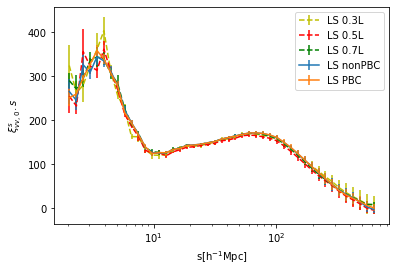

In [22]:
#LS estimator
ax = plt.axes()
ax.set_xscale("log")
#ax.set_yscale("log")
ax.errorbar(r, xi_vv0s_03_LS*r, fmt ='y--',yerr = error_xi_vv0s_03_LS*r,label="LS 0.3L")
ax.errorbar(r, xi_vv0s_05_LS*r, fmt ='r--',yerr = error_xi_vv0s_05_LS*r,label="LS 0.5L")
ax.errorbar(r, xi_vv0s_07_LS*r, fmt ='g--',yerr = error_xi_vv0s_07_LS*r,label="LS 0.7L")
ax.errorbar(r, xi_vv0s_LS*r,fmt ='-',yerr = error_xi_vv0s_LS*r,label="LS nonPBC")
ax.errorbar(r, xi_vv0s_pbc_LS*r,fmt ='-',yerr = error_xi_vv0s_pbc_LS*r,label="LS PBC")
ax.set_ylabel("$\\xi_{vv,0}^s.s$")
ax.set_xlabel("s[h$^{-1}$Mpc]")
#ax.set_xlim(1,100)
#ax.set_ylim(-2000,2000)
ax.legend()
#plt.savefig('vvs0-cutbox-correct.pdf')
#plt.savefig('vvs0-05.png')

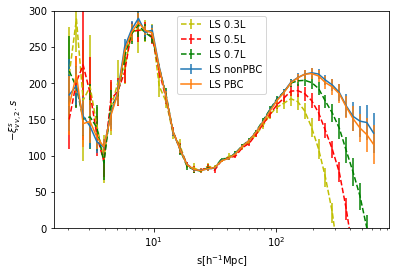

In [23]:
#LS estimator
ax = plt.axes()
ax.set_xscale("log")
#ax.set_yscale("log")
ax.errorbar(r, -xi_vv2s_03_LS*r, fmt ='y--',yerr = error_xi_vv2s_03_LS*r,label="LS 0.3L")
ax.errorbar(r, -xi_vv2s_05_LS*r, fmt ='r--',yerr = error_xi_vv2s_05_LS*r,label="LS 0.5L")
ax.errorbar(r, -xi_vv2s_07_LS*r, fmt ='g--',yerr = error_xi_vv2s_07_LS*r,label="LS 0.7L")
ax.errorbar(r, -xi_vv2s_LS*r, fmt ='-',yerr = error_xi_vv2s_LS*r,label="LS nonPBC")
ax.errorbar(r, -xi_vv2s_pbc_LS*r, fmt ='-',yerr = error_xi_vv2s_pbc_LS*r,label="LS PBC")
ax.set_ylabel("$-\\xi_{vv,2}^s.s$")
ax.set_xlabel("s[h$^{-1}$Mpc]")
#ax.set_xlim(100,)
ax.set_ylim(0,300)
ax.legend()
#plt.savefig('vvs2-cutbox-correct.pdf')
#plt.savefig('vvs2-05.png')

plot with the cut off theoretical curves

In [12]:
# velocity auto-correlation in realspace, theory, Fortran code
xi_vv0_th = np.loadtxt(path+'/my-f-code/results/xi-vv0-th-test.txt', usecols=(1))
xi_vv0_th *= f**2/3
xi_vv2_th = np.loadtxt(path+'/my-f-code/results/xi-vv2-th-test.txt', usecols=(1))
xi_vv2_th *= -2/3*f**2

# velocity auto-correlation cut-off in realspace, theory, Fortran code
xi_vv0_th_cut = np.loadtxt(path+'/my-f-code/results/xi-vv0-th-cut.txt', usecols=(1))
xi_vv0_th_cut *= f**2/3
xi_vv2_th_cut = np.loadtxt(path+'/my-f-code/results/xi-vv2-th-cut.txt', usecols=(1))
xi_vv2_th_cut *= -2/3*f**2

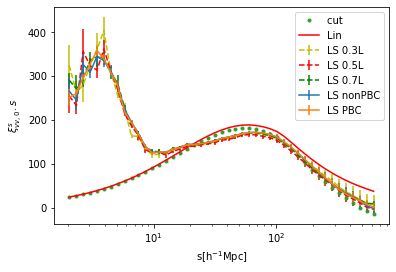

In [24]:
ax = plt.axes()
ax.set_xscale("log")
#ax.set_yscale("log")
ax.errorbar(r, xi_vv0s_03_LS*r, fmt ='y--',yerr = error_xi_vv0s_03_LS*r,label="LS 0.3L")
ax.errorbar(r, xi_vv0s_05_LS*r, fmt ='r--',yerr = error_xi_vv0s_05_LS*r,label="LS 0.5L")
ax.errorbar(r, xi_vv0s_07_LS*r, fmt ='g--',yerr = error_xi_vv0s_07_LS*r,label="LS 0.7L")
ax.errorbar(r, xi_vv0s_LS*r,fmt ='-',yerr = error_xi_vv0s_LS*r,label="LS nonPBC")
ax.errorbar(r, xi_vv0s_pbc_LS*r, fmt ='-',yerr = error_xi_vv0s_pbc_LS*r,label="LS PBC")
ax.plot(r, xi_vv0_th_cut*r,'.' ,label="cut ")
ax.plot(r, xi_vv0_th*r,'r-' ,label="Lin")
ax.set_ylabel("$\\xi_{vv,0}^s.s$")
ax.set_xlabel("s[h$^{-1}$Mpc]")
#ax.set_xlim(1,100)
#ax.set_ylim(-2000,2000)
ax.legend()
#plt.savefig('vvs0-cutbox.pdf')
#plt.savefig('vvs0-Lincut.png')

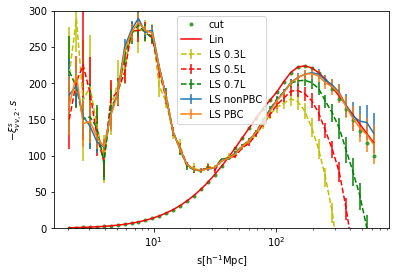

In [25]:
ax = plt.axes()
ax.set_xscale("log")
#ax.set_yscale("log")
ax.errorbar(r, -xi_vv2s_03_LS*r, fmt ='y--',yerr = error_xi_vv2s_03_LS*r,label="LS 0.3L")
ax.errorbar(r, -xi_vv2s_05_LS*r, fmt ='r--',yerr = error_xi_vv2s_05_LS*r,label="LS 0.5L")
ax.errorbar(r, -xi_vv2s_07_LS*r, fmt ='g--',yerr = error_xi_vv2s_07_LS*r,label="LS 0.7L")
ax.errorbar(r, -xi_vv2s_LS*r, fmt ='-',yerr = error_xi_vv2s_LS*r,label="LS nonPBC")
ax.errorbar(r, -xi_vv2s_pbc_LS*r, fmt ='-',yerr = error_xi_vv2s_pbc_LS*r,label="LS PBC")
ax.plot(r, -xi_vv2_th_cut*r,'.' ,label="cut")
ax.plot(r, -xi_vv2_th*r,'r-' ,label="Lin")
ax.set_ylabel("$-\\xi_{vv,2}^s.s$")
ax.set_xlabel("s[h$^{-1}$Mpc]")
#ax.set_xlim(100,)
ax.set_ylim(0,300)
ax.legend()
#plt.savefig('vvs2-cutbox.pdf')
#plt.savefig('vvs2-Lincut.png')